# Zender Aurelien Pandas Practice

In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [78]:
student_data=pd.read_csv('students_data.csv')
student_data.head(10)

,StudentID,Name,Gender,Grade,Attendance,Subject
0,1.0,Charlie,Male,69.0,NaN,English
1,2.0,Frank,M,55.0,71.0,Physics
2,3.0,Charlie,Male,75.0,97.0,Math
3,4.0,Alice,male,46.0,59.0,Biology
4,5.0,Noah,Male,47.0,86.0,Math
5,6.0,Alice,F,87.0,70.0,Biology
6,7.0,Karen,female,71.0,61.0,Physics
7,8.0,Frank,male,82.0,95.0,Physics
8,9.0,Bob,Male,82.0,52.0,English
9,10.0,Henry,M,56.0,86.0,Computer Science


In [79]:
print(student_data.dtypes)
print(student_data.shape)

StudentID     float64
Name           object
Gender         object
Grade         float64
Attendance    float64
Subject        object
dtype: object
(1000, 6)


In [80]:
student_data.describe()

,StudentID,Grade,Attendance
count,968.000000,955.000000,948.000000
mean,499.685950,65.568586,75.353376
std,288.515855,15.417402,14.733558
min,1.000000,12.000000,50.000000
25%,250.750000,55.000000,62.000000
50%,498.500000,65.000000,75.000000
75%,750.250000,76.000000,88.000000
max,1000.000000,113.000000,100.000000


In [ ]:
student_data.isnull().sum()#checks the total amount of null values in each column

StudentID     32
Name          18
Gender         0
Grade         45
Attendance    52
Subject        0
dtype: int64

In [ ]:
grademean=round(student_data.Grade.mean(),2)
student_data.Grade=student_data.Grade.fillna(grademean)#fills all null values in grade with average grade value
student_data.Attendance=student_data.Attendance.fillna(0) #fills all null attendance values with 0


In [83]:
student_data

,StudentID,Name,Gender,Grade,Attendance,Subject
0,1.0,Charlie,Male,69.0,0.0,English
1,2.0,Frank,M,55.0,71.0,Physics
2,3.0,Charlie,Male,75.0,97.0,Math
3,4.0,Alice,male,46.0,59.0,Biology
4,5.0,Noah,Male,47.0,86.0,Math
...,...,...,...,...,...,...
995,996.0,Jack,male,77.0,60.0,Chemistry
996,997.0,Charlie,Male,63.0,71.0,Science
997,998.0,Noah,female,51.0,79.0,Math
998,999.0,Charlie,Male,52.0,73.0,English


In [ ]:
student_data.dropna(axis=0, how='any',inplace=True)#permanently drops remaining rows with null values

In [85]:
student_data.isnull().sum()

StudentID     0
Name          0
Gender        0
Grade         0
Attendance    0
Subject       0
dtype: int64

In [ ]:
student_data['Gender']=student_data['Gender'].replace('M','Male')
student_data['Gender']=student_data['Gender'].replace('male','Male')
student_data['Gender']=student_data['Gender'].replace('F','Female')
student_data['Gender']=student_data['Gender'].replace('female','Female')
#cleaning up gender values

In [ ]:
passed = pd.Series(student_data.Grade>=50)
student_data['Pass/Fail']=passed #adding a column containing whether or not students passed

In [88]:
student_data

,StudentID,Name,Gender,Grade,Attendance,Subject,Pass/Fail
0,1.0,Charlie,Male,69.0,0.0,English,True
1,2.0,Frank,Male,55.0,71.0,Physics,True
2,3.0,Charlie,Male,75.0,97.0,Math,True
3,4.0,Alice,Male,46.0,59.0,Biology,False
4,5.0,Noah,Male,47.0,86.0,Math,False
...,...,...,...,...,...,...,...
995,996.0,Jack,Male,77.0,60.0,Chemistry,True
996,997.0,Charlie,Male,63.0,71.0,Science,True
997,998.0,Noah,Female,51.0,79.0,Math,True
998,999.0,Charlie,Male,52.0,73.0,English,True


In [ ]:
attending=student_data['Attendance']>75
student_data2=student_data[attending]
student_data2 #second dataframe containing only students that have an attendance over 75

,StudentID,Name,Gender,Grade,Attendance,Subject,Pass/Fail
2,3.0,Charlie,Male,75.0,97.0,Math,True
4,5.0,Noah,Male,47.0,86.0,Math,False
7,8.0,Frank,Male,82.0,95.0,Physics,True
9,10.0,Henry,Male,56.0,86.0,Computer Science,True
11,12.0,Noah,Male,78.0,79.0,Science,True
...,...,...,...,...,...,...,...
986,987.0,Mia,Female,67.0,88.0,Physics,True
987,988.0,Jack,Female,66.0,77.0,English,True
988,989.0,Charlie,Female,75.0,93.0,History,True
992,993.0,Eve,Male,53.0,76.0,Science,True


In [90]:
student_data2=student_data2.sort_values('Attendance',ascending=False)

In [ ]:
student_data.groupby(student_data.Subject).Grade.mean() #average grade in each subject

Subject
Biology             64.859496
Chemistry           67.698087
Computer Science    64.568818
English             65.432066
History             65.031417
Math                65.340792
Physics             66.223628
Science             65.190417
Name: Grade, dtype: float64

In [ ]:
top_3_students=student_data.groupby('Subject').apply(lambda x: x.nlargest(3,'Grade'))
#sorts the top 3 students by grade in each subject
top_3_students

C:\Users\zende\AppData\Local\Temp\ipykernel_19064\1645944135.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_students=student_data.groupby('Subject').apply(lambda x: x.nlargest(3,'Grade'))


StudentID     Name  Gender  Grade  Attendance  \
Subject                                                               
Biology          994      995.0    Karen  Female  101.0        58.0   
                 860      861.0    Henry  Female   98.0         0.0   
                 494      495.0     Liam  Female   92.0        69.0   
Chemistry        926      927.0  Charlie  Female  107.0        72.0   
                 739      740.0     Liam    Male  101.0        60.0   
                 734      735.0    Karen    Male  100.0         0.0   
Computer Science 563      564.0      Eve    Male  100.0        93.0   
                 141      142.0   Olivia    Male   89.0        55.0   
                 873      874.0   Olivia  Female   88.0        80.0   
English          844      845.0      Bob    Male  106.0        54.0   
                 977      978.0    Henry    Male   98.0        61.0   
                 19        20.0    Alice    Male   96.0        79.0   
History          353      354.0    Alice    Male  101.0        87.0   
                 657      658.0     Jack    Male   94.0        64.0   
                 877      878.0      Ivy  Female   94.0        85.0   
Math             198      199.0     Jack    Male  107.0         0.0   
                 715      716.0     Noah    Male  107.0        97.0   
                 939      940.0     Jack  Female  101.0        66.0   
Physics          36        37.0   Olivia    Male  108.0        59.0   
                 275      276.0      Mia    Male  103.0        78.0   
                 846      847.0    Henry  Female  101.0        75.0   
Science          274      275.0     Jack    Male  103.0        63.0   
                 840      841.0    David    Male  102.0        76.0   
                 786      787.0     Liam    Male   97.0        74.0   

                               Subject  Pass/Fail  
Subject                                            
Biology          994           Biology       True  
                 860           Biology       True  
                 494           Biology       True  
Chemistry        926         Chemistry       True  
                 739         Chemistry       True  
                 734         Chemistry       True  
Computer Science 563  Computer Science       True  
                 141  Computer Science       True  
                 873  Computer Science       True  
English          844           English       True  
                 977           English       True  
                 19            English       True  
History          353           History       True  
                 657           History       True  
                 877           History       True  
Math             198              Math       True  
                 715              Math       True  
                 939              Math       True  
Physics          36            Physics       True  
                 275           Physics       True  
                 846           Physics       True  
Science          274           Science       True  
                 840           Science       True  
                 786           Science       True

In [93]:
top_3_students=pd.DataFrame(top_3_students)
print(top_3_students)

                      StudentID     Name  Gender  Grade  Attendance  \
Subject                                                               
Biology          994      995.0    Karen  Female  101.0        58.0   
                 860      861.0    Henry  Female   98.0         0.0   
                 494      495.0     Liam  Female   92.0        69.0   
Chemistry        926      927.0  Charlie  Female  107.0        72.0   
                 739      740.0     Liam    Male  101.0        60.0   
                 734      735.0    Karen    Male  100.0         0.0   
Computer Science 563      564.0      Eve    Male  100.0        93.0   
                 141      142.0   Olivia    Male   89.0        55.0   
                 873      874.0   Olivia  Female   88.0        80.0   
English          844      845.0      Bob    Male  106.0        54.0   
                 977      978.0    Henry    Male   98.0        61.0   
                 19        20.0    Alice    Male   96.0        79.0   
Histor

In [ ]:
student_pivot=pd.pivot_table(student_data,values='Grade',index='Subject',columns='Gender',aggfunc='mean')
print(student_pivot)
#pivot table of the average grade in each subject by gender

Gender               Female       Male
Subject                               
Biology           66.871897  62.946066
Chemistry         69.806071  65.697288
Computer Science  63.705882  65.314746
English           65.685636  65.220758
History           64.242982  65.673429
Math              64.677674  65.832414
Physics           65.507778  66.878814
Science           66.510986  63.906027


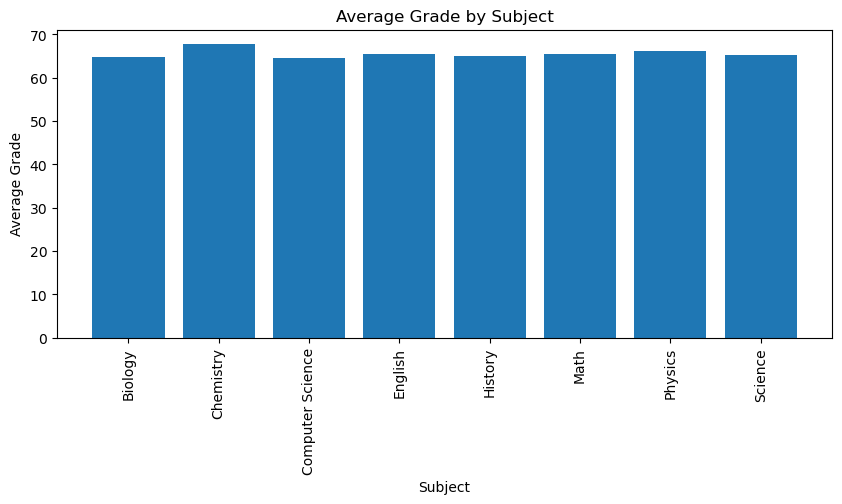

In [ ]:
plt.figure(figsize=(10,4))
avg_grade=student_data.groupby('Subject')['Grade'].mean().reset_index()
plt.bar(avg_grade['Subject'],avg_grade['Grade'])
plt.title("Average Grade by Subject")
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.xticks(rotation=90)#rotates names 90 degrees

plt.show()

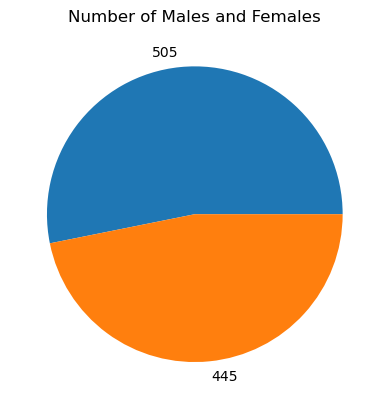

In [ ]:
gender_count=student_data.Gender.value_counts()#has the number of each gender value

plt.pie(gender_count,labels=gender_count)
plt.title("Number of Males and Females")

plt.show()

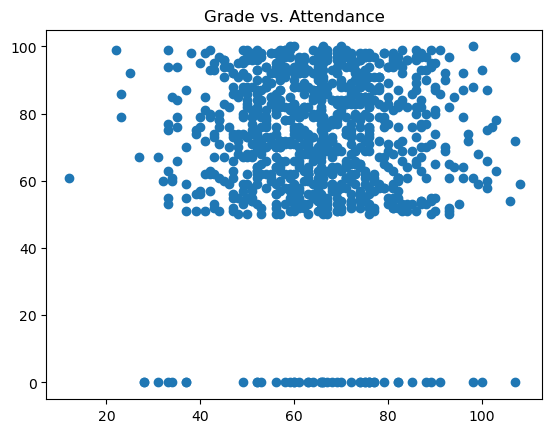

In [97]:
plt.scatter(student_data.Grade,student_data.Attendance)

plt.title('Grade vs. Attendance')
plt.show()